This code is to visualize the data to decide on how to work with it
the data is an excel sheet of 56250 rows and 3 columns first column is the text the second is the label and the third is the language

✅ Dataset Loaded Successfully!
Shape: (56250, 3)

                                               text        label language
0                listen will you now give me a show   do_a_trick       en
1          hey friend can you instantly flip around  turn_around       en
2                  go1 could you quickly posture up        stand       en
3              listen go1 can you for me about face  turn_around       en
4  listen friend could you now go back about 6 step      go_back       en

Columns: ['text', 'label', 'language']

Missing values:
 text        0
label       0
language    0
dtype: int64

Label distribution:
 label
do_a_trick     6250
turn_around    6250
stand          6250
go_back        6250
go_right       6250
go_forward     6250
sit            6250
go_left        6250
no_meaning     6250
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_19020\2317471969.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')


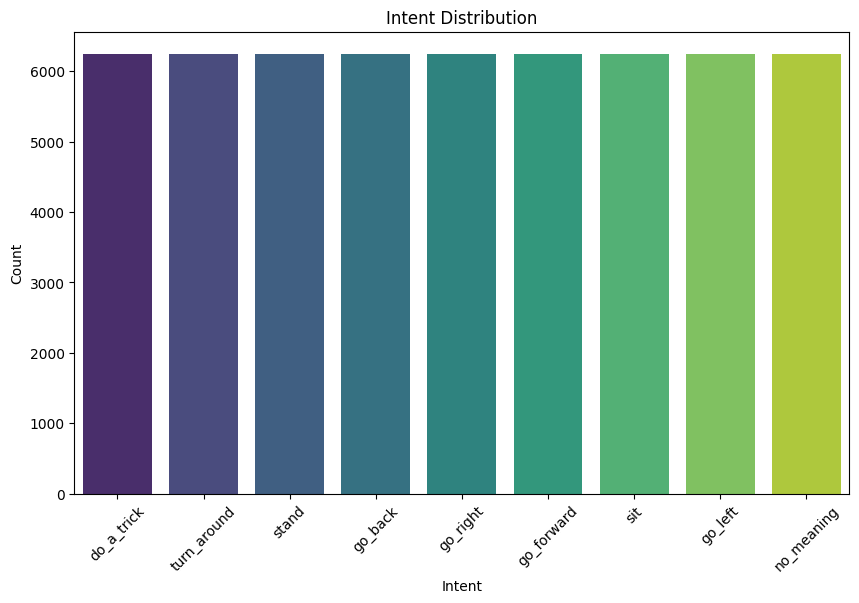

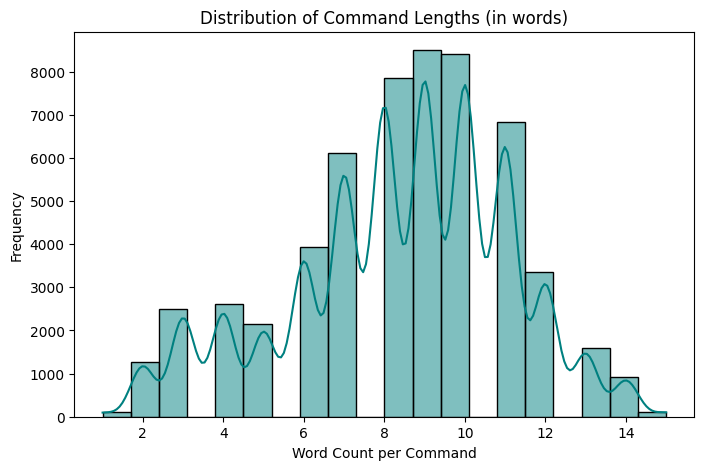


Text Length Stats:
 count    56250.000000
mean         8.385902
std          2.743849
min          1.000000
25%          7.000000
50%          9.000000
75%         10.000000
max         15.000000
Name: text_length, dtype: float64


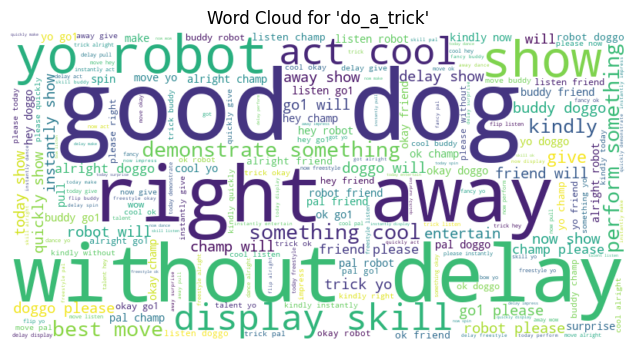

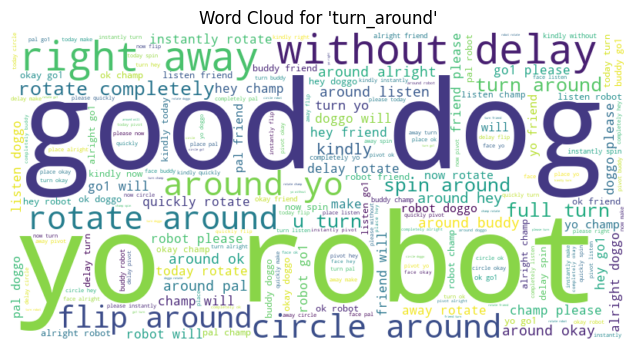

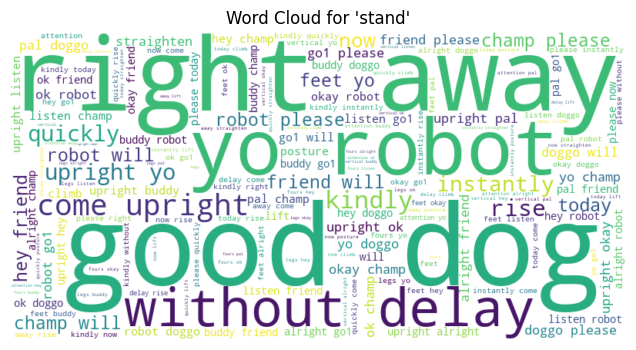

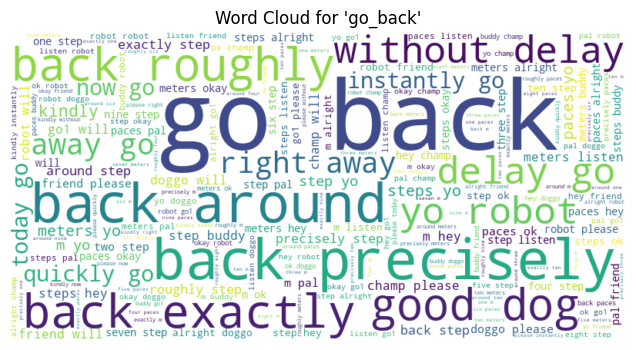

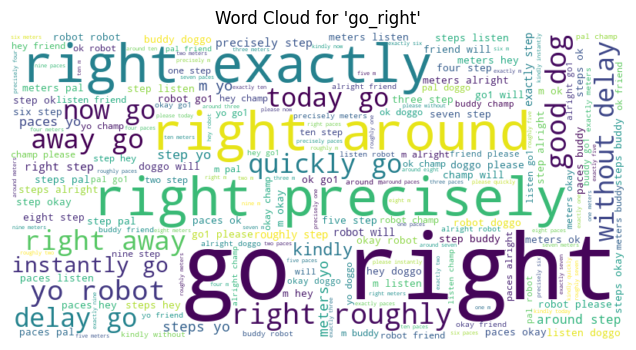

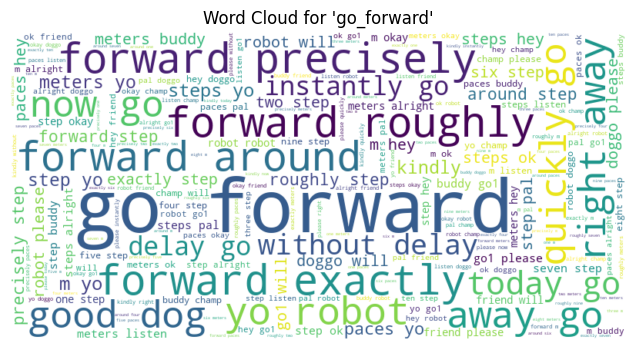

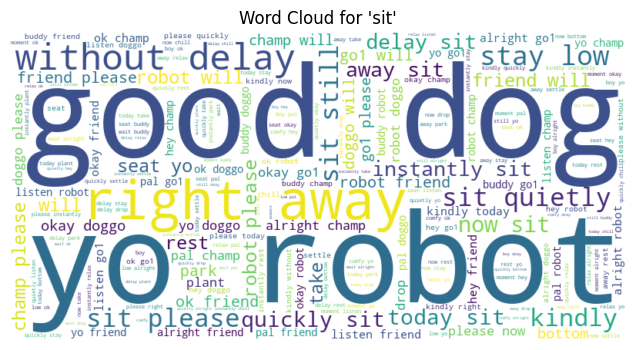

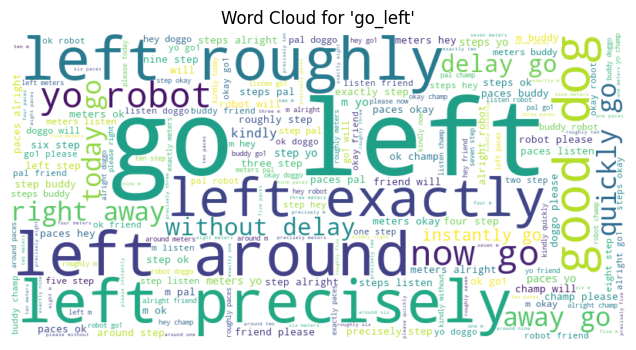

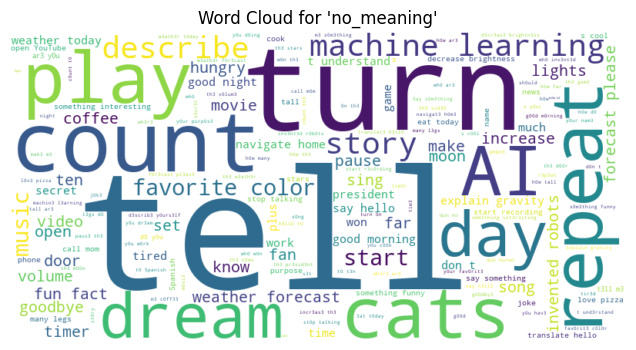


Cleaned Sample Texts:
                                                     text  \
53327  buddy friend please now go right precisely one...   
48256              ok be a good dog and now entertain me   
33455  yo robot friend be a good dog and today go for...   
22295  hey doggo will you quickly go left around nine...   
50779  doggo would you kindly for me go left just 10 ...   

                                              clean_text  
53327  buddy friend please now go right precisely one...  
48256              ok be a good dog and now entertain me  
33455  yo robot friend be a good dog and today go for...  
22295  hey doggo will you quickly go left around nine...  
50779  doggo would you kindly for me go left just meters  

Train: 39375, Val: 8437, Test: 8438

Classification Report:

              precision    recall  f1-score   support

  do_a_trick       1.00      1.00      1.00       937
     go_back       1.00      1.00      1.00       937
  go_forward       1.00      1.00   

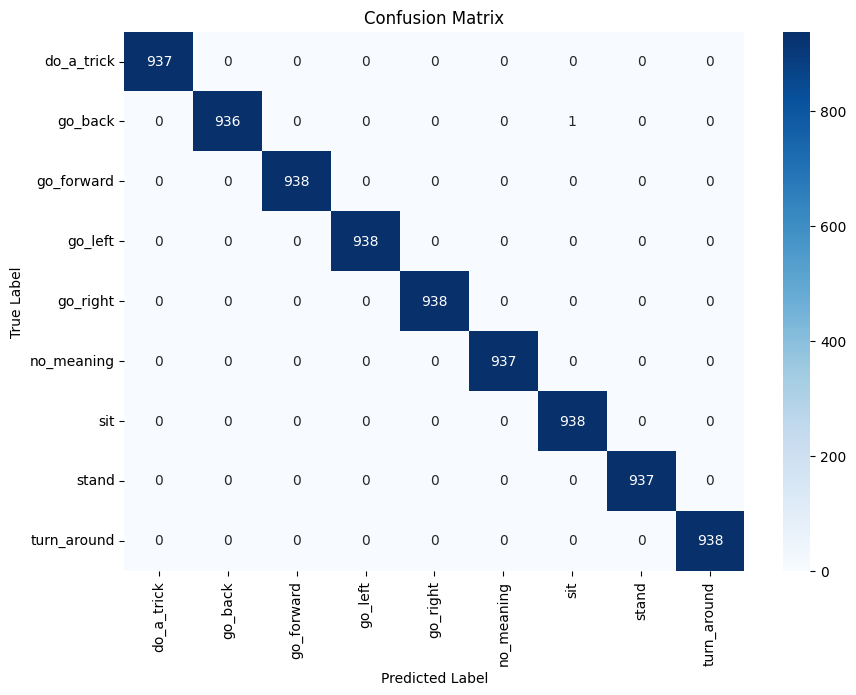


✅ Model and label encoder saved successfully!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix


file_name = "voice_commands_dataset_en_with_no_meaning.csv"
df = pd.read_csv(file_name)

print("✅ Dataset Loaded Successfully!")
print(f"Shape: {df.shape}\n")
print(df.head())

print("\nColumns:", df.columns.tolist())

print("\nMissing values:\n", df.isnull().sum())


print("\nLabel distribution:\n", df['label'].value_counts())


plt.figure(figsize=(10,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title("Intent Distribution")
plt.xlabel("Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=20, kde=True, color='teal')
plt.title("Distribution of Command Lengths (in words)")
plt.xlabel("Word Count per Command")
plt.ylabel("Frequency")
plt.show()

print("\nText Length Stats:\n", df['text_length'].describe())


intents = df['label'].unique()

for intent in intents:
    text = " ".join(df[df['label'] == intent]['text'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{intent}'")
    plt.show()


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

print("\nCleaned Sample Texts:\n", df[['text', 'clean_text']].sample(5))

X = df['clean_text']
y = df['label']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(f"\nTrain: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=300, solver='lbfgs'))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


import joblib
joblib.dump(pipe, "intent_classifier_tfidf_lr.pkl")
joblib.dump(le, "label_encoder.pkl")

print("\n✅ Model and label encoder saved successfully!")



In the below snippet i apply PCA to visualize the data in 2d, we can see that they are clearly seperated into defined groups but each group is a mix off intents and not seperate intent, so i dont know what can we take away from this.

✅ Dataset Loaded Successfully!
Shape: (56250, 3)

                                               text        label language
0                listen will you now give me a show   do_a_trick       en
1          hey friend can you instantly flip around  turn_around       en
2                  go1 could you quickly posture up        stand       en
3              listen go1 can you for me about face  turn_around       en
4  listen friend could you now go back about 6 step      go_back       en

Columns: ['text', 'label', 'language']

Missing values:
 text        0
label       0
language    0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')


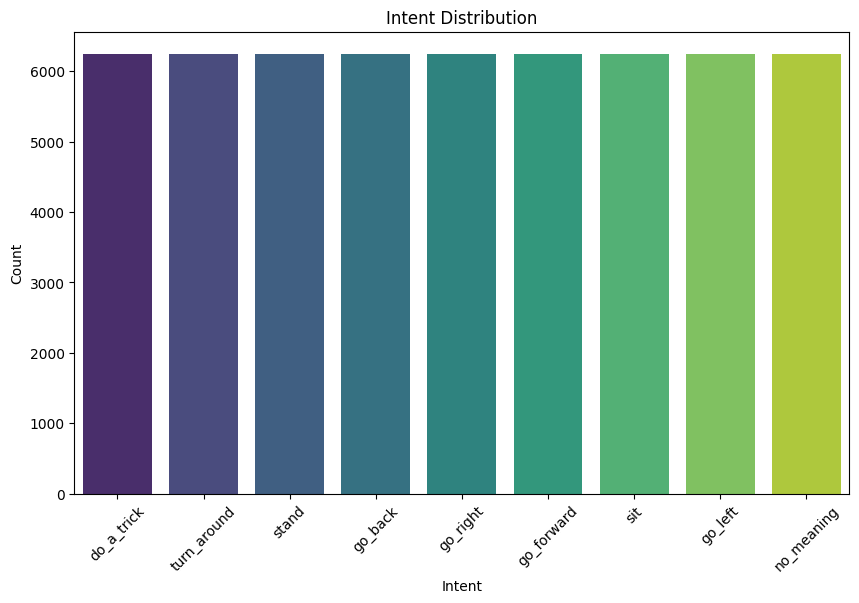

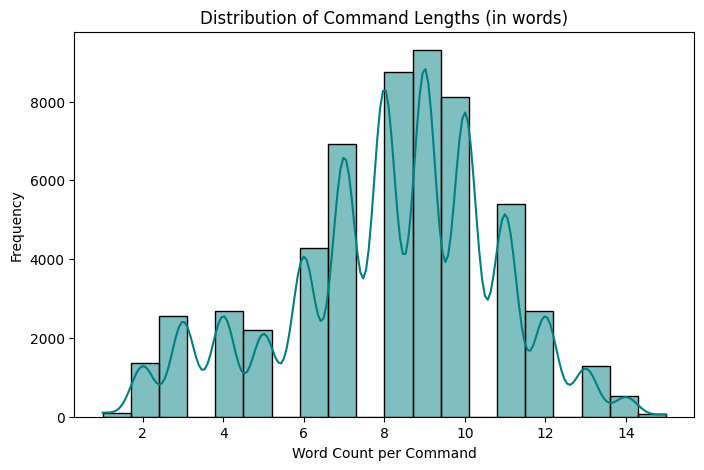

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df, palette='Set3')


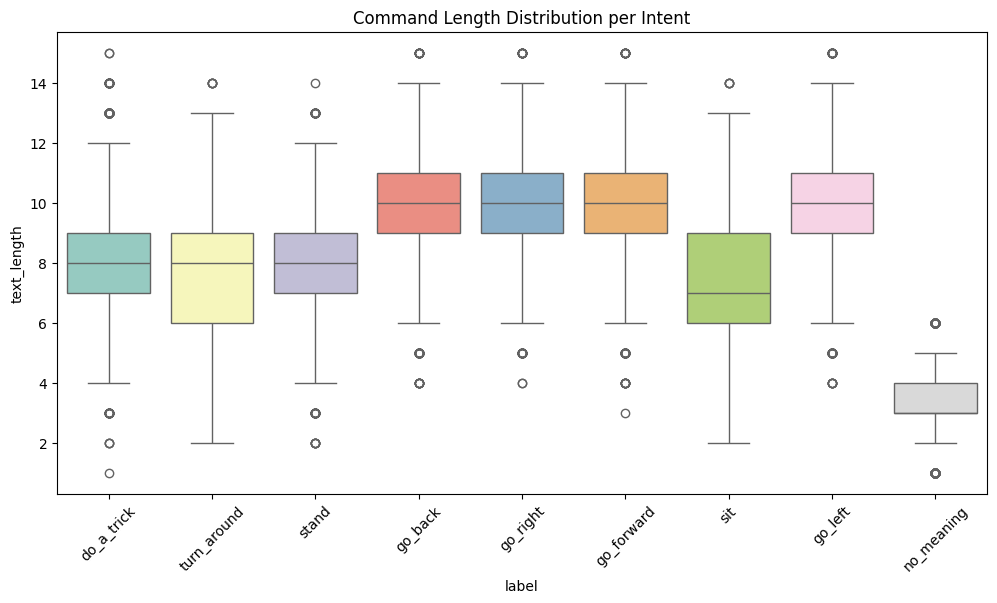


Text Length Stats:
 count    56250.000000
mean         8.143253
std          2.634569
min          1.000000
25%          7.000000
50%          8.000000
75%         10.000000
max         15.000000
Name: text_length, dtype: float64


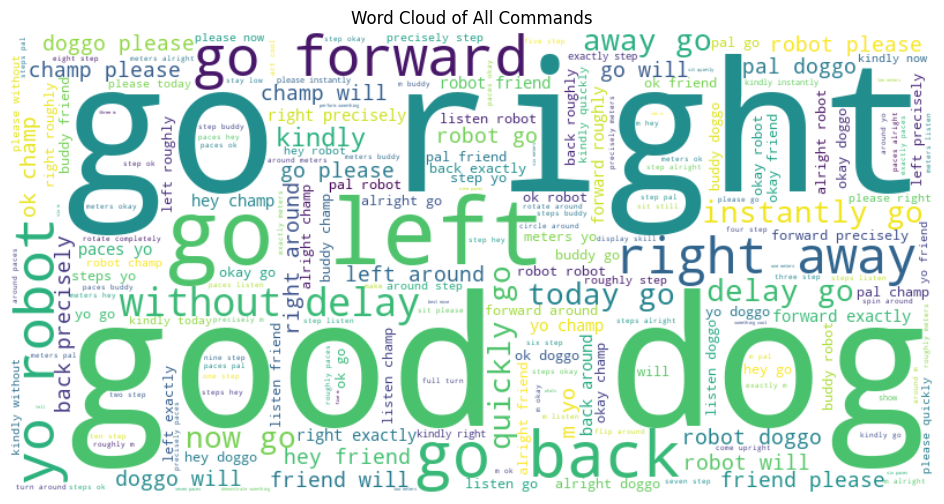

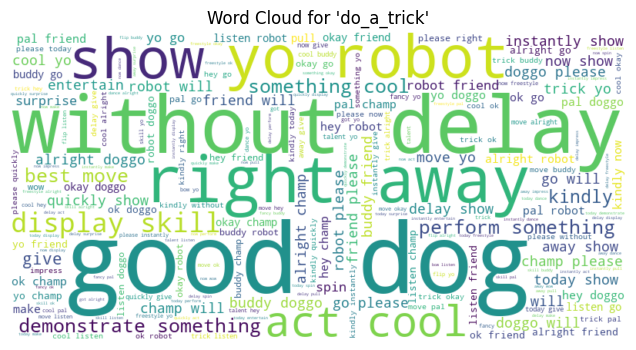

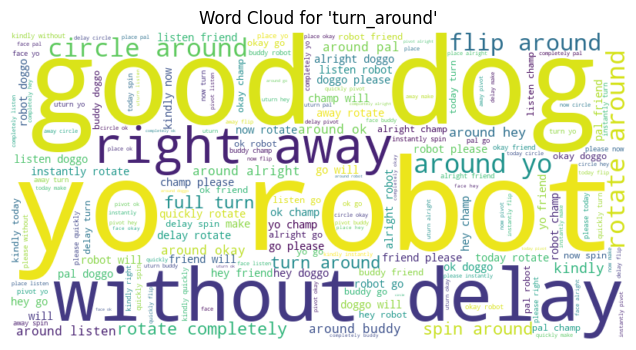

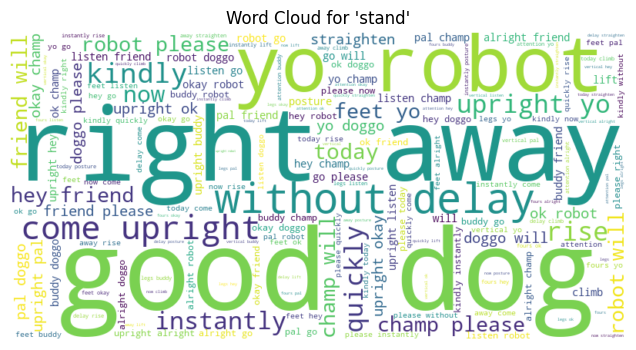

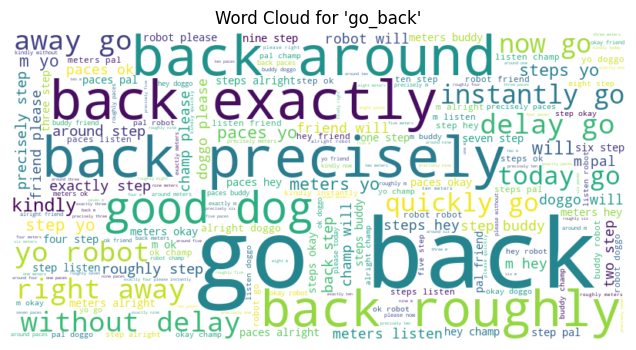

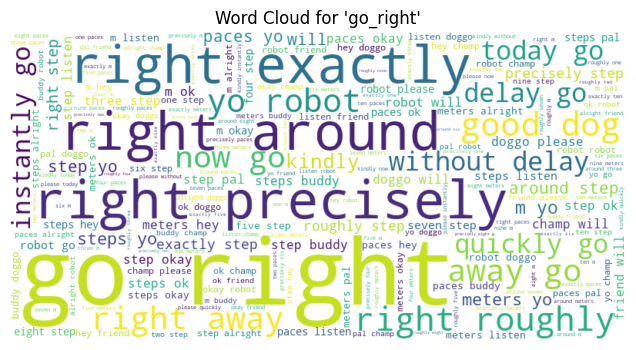

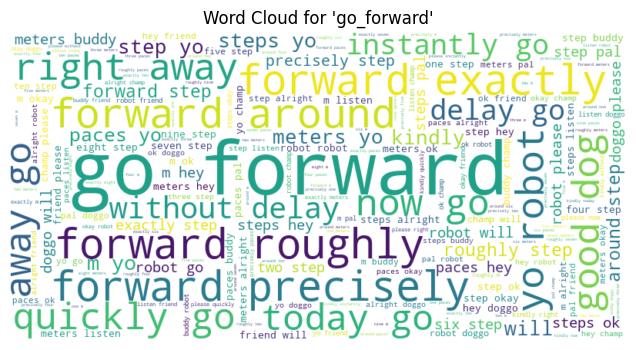

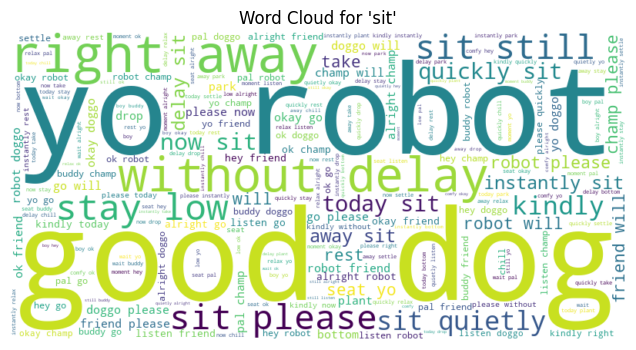

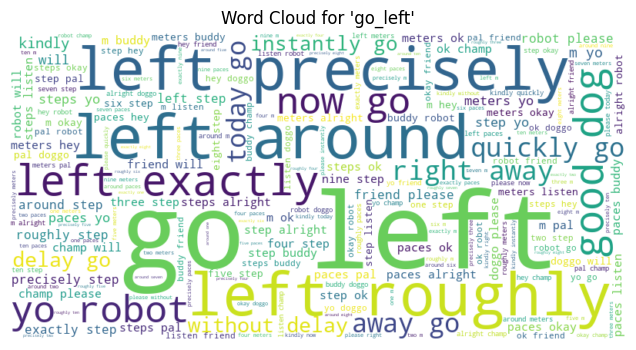

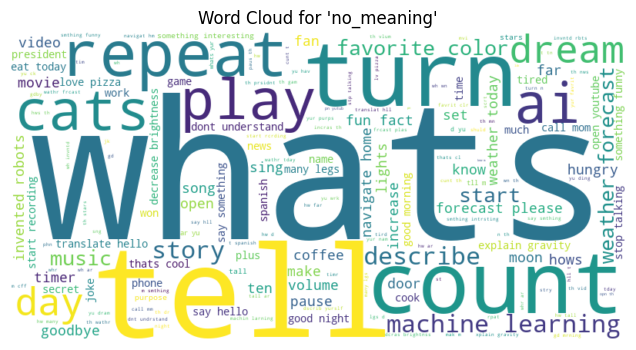

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


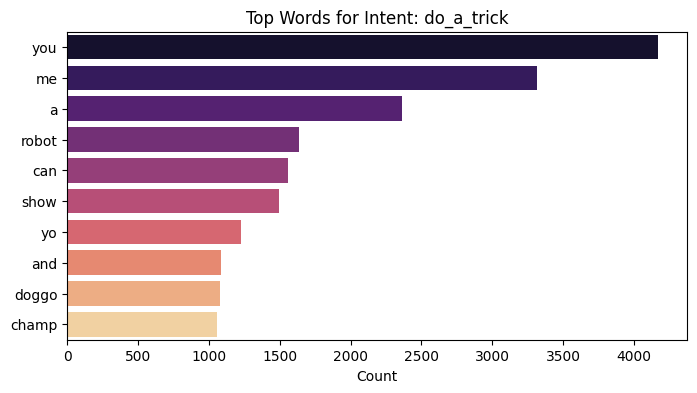

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


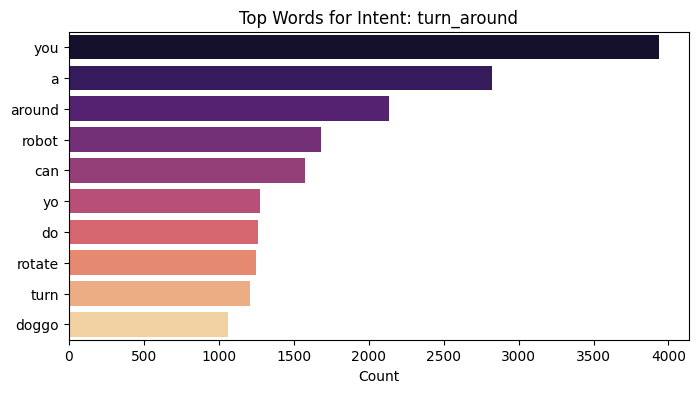

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


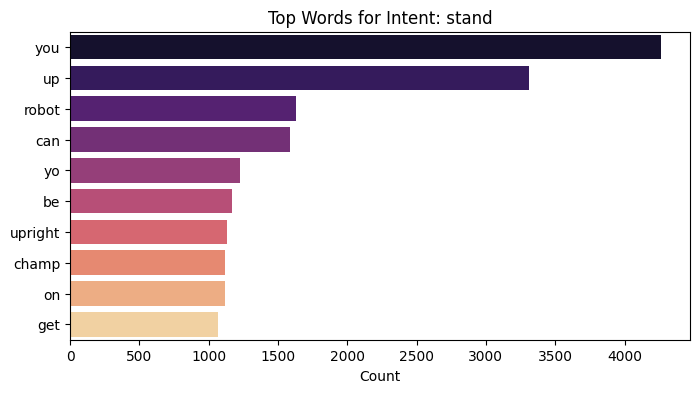

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


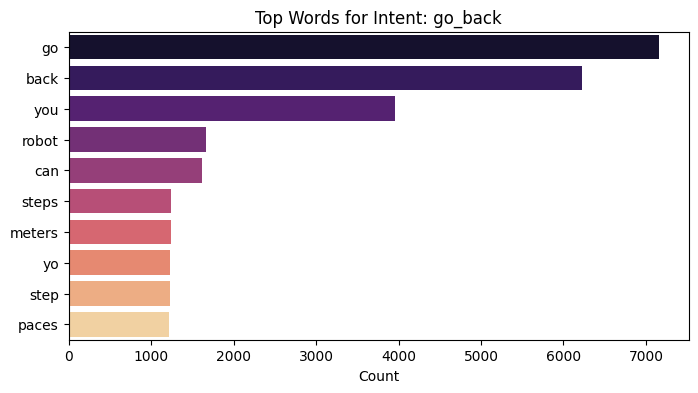

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


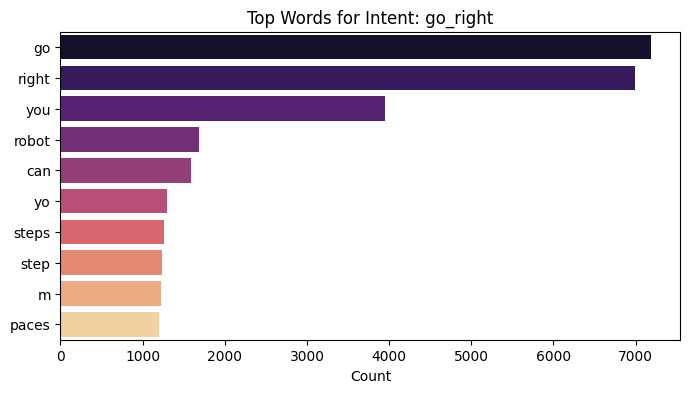

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


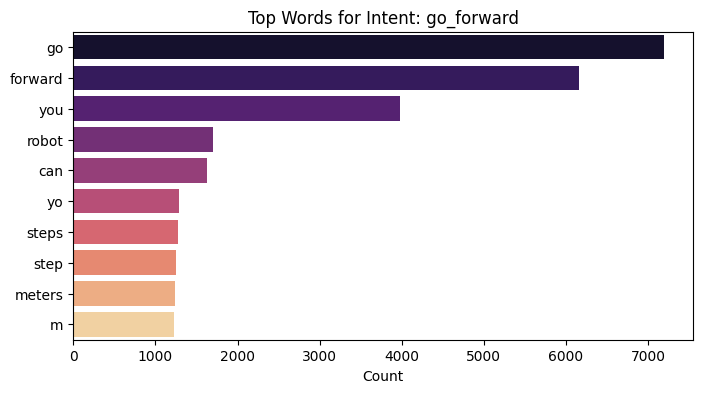

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


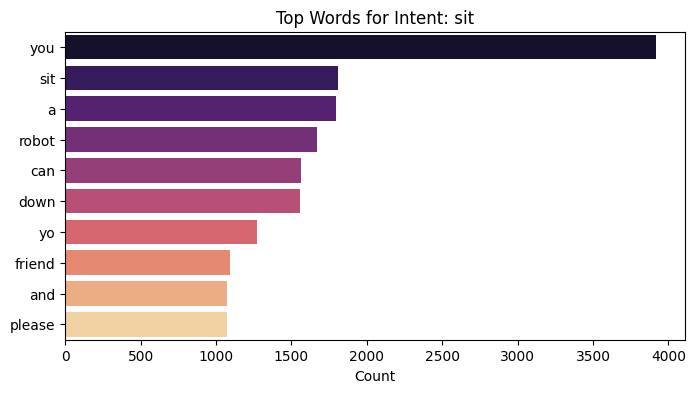

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


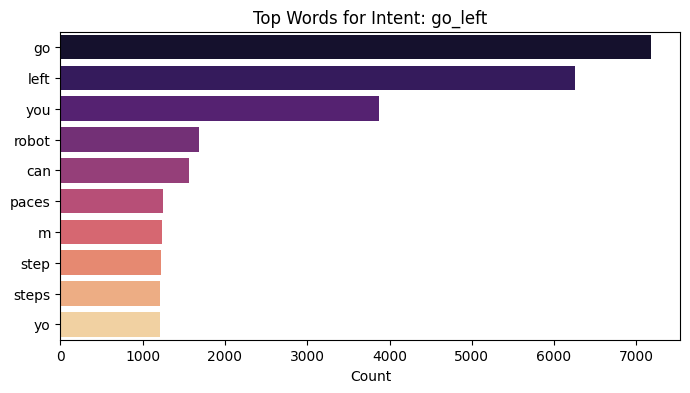

C:\Users\user\AppData\Local\Temp\ipykernel_19020\3360325272.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words_list), palette='magma')


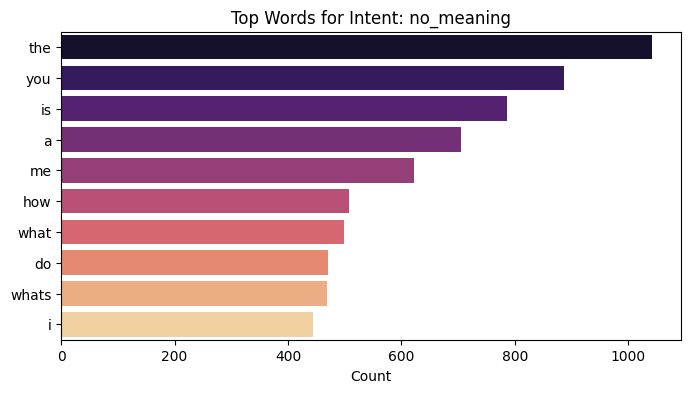

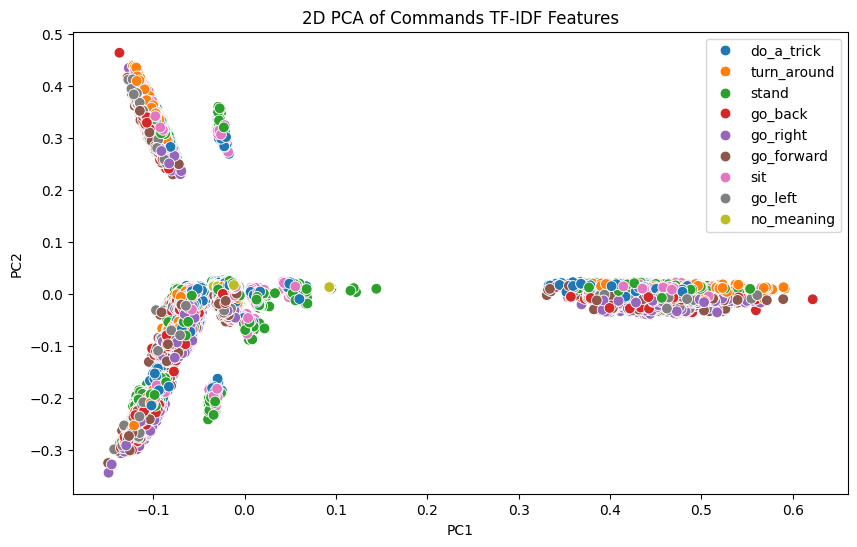

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# ----------------------------
# Load Dataset
# ----------------------------
file_name = "voice_commands_dataset_en_with_no_meaning.csv"
df = pd.read_csv(file_name)

print("✅ Dataset Loaded Successfully!")
print(f"Shape: {df.shape}\n")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# ----------------------------
# Text Cleaning
# ----------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

# ----------------------------
# Text Length Analysis
# ----------------------------
df['text_length'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title("Intent Distribution")
plt.xlabel("Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=20, kde=True, color='teal')
plt.title("Distribution of Command Lengths (in words)")
plt.xlabel("Word Count per Command")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='text_length', data=df, palette='Set3')
plt.title("Command Length Distribution per Intent")
plt.xticks(rotation=45)
plt.show()

print("\nText Length Stats:\n", df['text_length'].describe())

# ----------------------------
# Word Clouds
# ----------------------------
intents = df['label'].unique()

# Overall Word Cloud
all_text = " ".join(df['clean_text'])
wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Commands")
plt.show()

# Word Clouds per Intent
for intent in intents:
    text = " ".join(df[df['label'] == intent]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{intent}'")
    plt.show()

# ----------------------------
# Top Words per Intent
# ----------------------------
for intent in intents:
    words = " ".join(df[df['label']==intent]['clean_text']).split()
    most_common = Counter(words).most_common(10)
    words_list, counts = zip(*most_common)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=list(counts), y=list(words_list), palette='magma')
    plt.title(f"Top Words for Intent: {intent}")
    plt.xlabel("Count")
    plt.show()

# ----------------------------
# PCA Visualization of TF-IDF Features
# ----------------------------
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray()

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['label'], palette='tab10', s=60)
plt.title("2D PCA of Commands TF-IDF Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
